In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [2]:
loc = "../local_data/he2_log2"
types = 'crx'

In [3]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [25]:
exact_energy = -5.74032428

In [26]:
en_min = np.min(energies_ng[:,:,:,-1], axis=2) - exact_energy

en_min

array([[0.03151061, 0.03449084, 0.03160264, 0.03454425, 0.03248384,
        0.0340183 , 0.03708627],
       [0.03021886, 0.02984311, 0.02876498, 0.02881267, 0.03105094,
        0.03192546, 0.03568628],
       [0.0291722 , 0.02888896, 0.03039958, 0.03131749, 0.03252294,
        0.03369071, 0.03696086],
       [0.03038289, 0.0289705 , 0.03044965, 0.03111579, 0.03320052,
        0.03410794, 0.03792121],
       [0.03023746, 0.03026321, 0.031554  , 0.03123882, 0.03274324,
        0.0355251 , 0.04459121],
       [0.03263881, 0.03243377, 0.03313424, 0.03306367, 0.03569581,
        0.03799178, 0.05071189],
       [0.04733445, 0.05233648, 0.04567697, 0.04814079, 0.05198028,
        0.07287099, 0.42409017]])

In [27]:
weights_lr_list = np.linspace(0.1, 0.001, 7)
phi_lr_list = np.linspace(0.1, 0.001, 7)

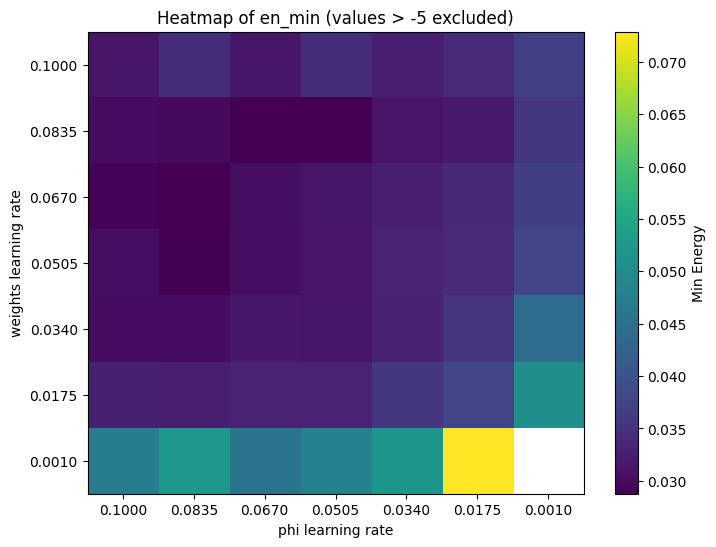

: 

In [ ]:
masked_en_min = np.where(en_min>0.1, np.nan, en_min)
plt.figure(figsize=(8, 6))
plt.imshow(masked_en_min, aspect='auto', cmap='viridis')
plt.colorbar(label='Min Energy')
plt.xticks(ticks=np.arange(len(phi_lr_list)), labels=[f"{lr:.4f}" for lr in phi_lr_list])
plt.yticks(ticks=np.arange(len(weights_lr_list)), labels=[f"{lr:.4f}" for lr in weights_lr_list])
plt.xlabel('phi learning rate')
plt.ylabel('weights learning rate')
plt.show()

In [29]:
mean_loss_ng = np.mean(energies_ng, axis=1)

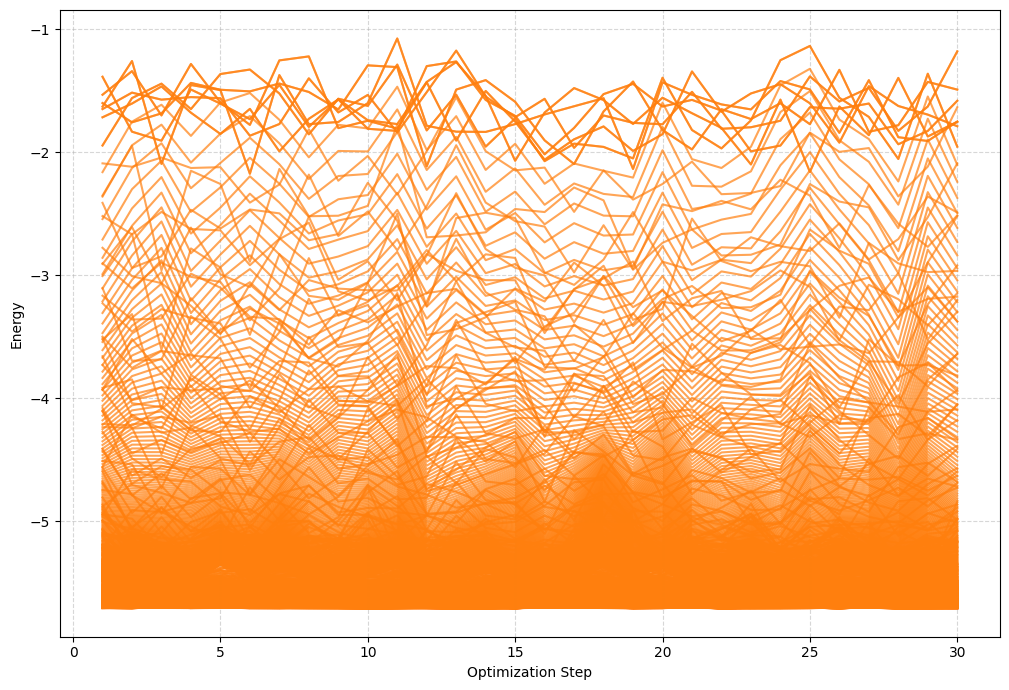

In [30]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_ng.shape[1] + 1)

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [31]:
exact_energy = -5.74032428
thetas = np.arange(0, 40, np.pi)

In [32]:
min_ng = np.min(energies_ng, axis=1)[:,-1]

ValueError: x and y must have same first dimension, but have shapes (13,) and (7, 201)

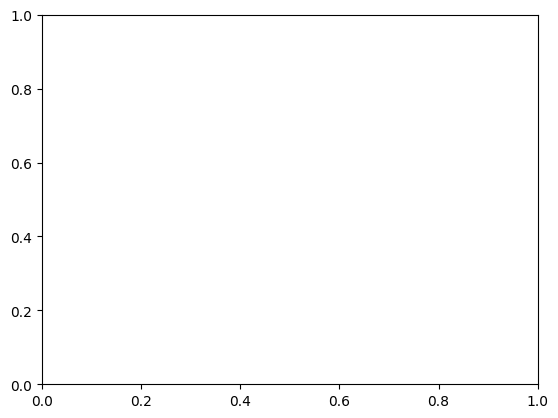

In [33]:
plt.plot(thetas, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [ ]:
median_ng = np.median(energies_ng, axis=1)[:,-1]

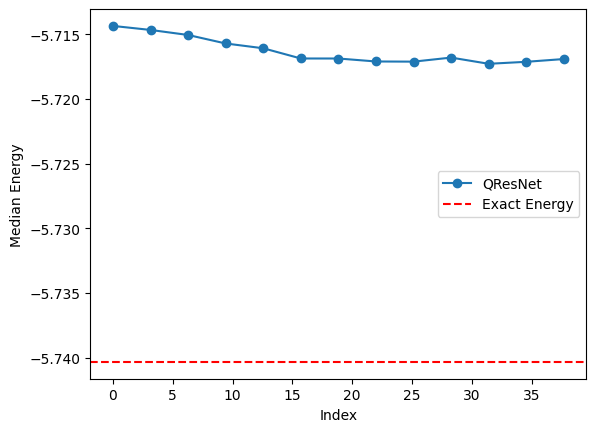

In [ ]:
plt.plot(thetas, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()